# PROBLEM STATEMENT:

### IN THIS DATA WE HAVE SET OF VARIABLES ALONG WITH THE CHURN COLUMN WHICH IS OUR 
### TARGET VARIABLE.WE NEED TO FIND THOSE CUSTOMERS WHO IS GOING TO CHURN.







## IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORTING DATASET

In [2]:
df =pd.read_csv("E:\\DATA SCIENCE\\Datasets\\Churn_MV.csv")

# DATA ANALYSIS AND VISUALIZATION

In [3]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.7,KS,415.0,382-4657
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.7,OH,415.0,371-7191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(6666, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 22 columns):
Account Length      3333 non-null float64
VMail Message       3333 non-null float64
Day Mins            3333 non-null float64
Eve Mins            3333 non-null float64
Night Mins          3333 non-null float64
Intl Mins           3333 non-null float64
CustServ Calls      3333 non-null float64
Churn               3333 non-null float64
Intl Plan           3333 non-null float64
VMail Plan          3333 non-null float64
Day Calls           3333 non-null float64
Day Charge          3333 non-null float64
Daily Charges MV    3283 non-null float64
Eve Calls           3333 non-null float64
Eve Charge          3333 non-null float64
Night Calls         3333 non-null float64
Night Charge        3333 non-null float64
Intl Calls          3333 non-null float64
Intl Charge         3333 non-null float64
State               3333 non-null object
Area Code           3333 non-null float64
Phone       

In [6]:
df.dtypes

Account Length      float64
VMail Message       float64
Day Mins            float64
Eve Mins            float64
Night Mins          float64
Intl Mins           float64
CustServ Calls      float64
Churn               float64
Intl Plan           float64
VMail Plan          float64
Day Calls           float64
Day Charge          float64
Daily Charges MV    float64
Eve Calls           float64
Eve Charge          float64
Night Calls         float64
Night Charge        float64
Intl Calls          float64
Intl Charge         float64
State                object
Area Code           float64
Phone                object
dtype: object

### DELETING EXTRA ROWS

In [7]:
df.dropna(axis=0,how='all',inplace=True)

In [8]:
df.shape

(3333, 22)

In [9]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.70,KS,415.0,382-4657
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.70,OH,415.0,371-7191
5,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0.0,0.0,0.0,...,41.38,110.0,10.30,104.0,7.32,5.0,3.29,NJ,415.0,358-1921
7,84.0,0.0,299.4,61.9,196.9,6.6,2.0,0.0,1.0,0.0,...,50.90,88.0,5.26,89.0,8.86,7.0,1.78,OH,408.0,375-9999
9,75.0,0.0,166.7,148.3,186.9,10.1,3.0,0.0,1.0,0.0,...,28.34,122.0,12.61,121.0,8.41,3.0,2.73,OK,415.0,330-6626


# CHECKING MISSING VALUES

In [10]:
df.isnull().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
VMail Plan           0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Phone                0
dtype: int64

# There are 50 missing values in 'daily charges MV'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 6665
Data columns (total 22 columns):
Account Length      3333 non-null float64
VMail Message       3333 non-null float64
Day Mins            3333 non-null float64
Eve Mins            3333 non-null float64
Night Mins          3333 non-null float64
Intl Mins           3333 non-null float64
CustServ Calls      3333 non-null float64
Churn               3333 non-null float64
Intl Plan           3333 non-null float64
VMail Plan          3333 non-null float64
Day Calls           3333 non-null float64
Day Charge          3333 non-null float64
Daily Charges MV    3283 non-null float64
Eve Calls           3333 non-null float64
Eve Charge          3333 non-null float64
Night Calls         3333 non-null float64
Night Charge        3333 non-null float64
Intl Calls          3333 non-null float64
Intl Charge         3333 non-null float64
State               3333 non-null object
Area Code           3333 non-null float64
Phone       

## CHANGING DATATYPES

In [12]:
df['Churn'] = df['Churn'].astype('category')
df['Intl Plan'] = df['Intl Plan'].astype('category')
df['VMail Plan'] = df['VMail Plan'].astype('category')

## CHECKING MISSING VALUES

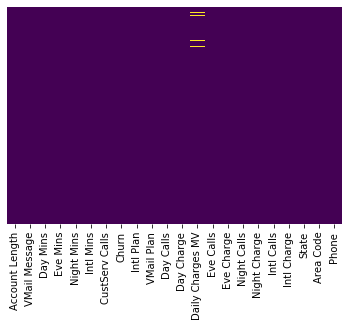

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## CHECKING OUTLIERS IN 'DAILY CHARGES MV' 

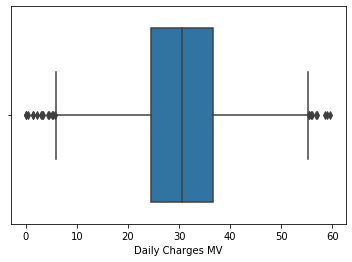

In [15]:
sns.boxplot(df['Daily Charges MV'])

### AS WE CAN SEE THERE ARE OUTLIERS IN THE COLUMN.
### IT WOULD BE BETTER TO REPLACE WITH MEDIAN.

In [16]:
median_value = df['Daily Charges MV'].median()
df['Daily Charges MV']= df['Daily Charges MV'].fillna(median_value)

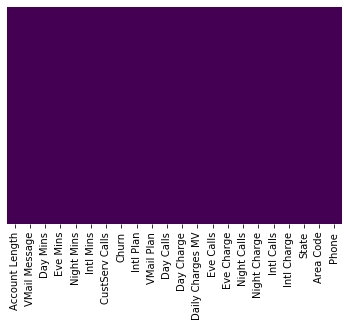

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## NO MISSING VALUES.

In [21]:
df.groupby('Churn').mean()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Churn,,,,,,,,,,,,,,,,,
0.0,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,29.776007,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
1.0,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,34.999545,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [22]:
df.groupby('VMail Plan').sum()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
VMail Plan,,,,,,,,,,,,,,,,,
0.0,243494.0,0.0,433574.5,482934.8,483844.2,24687.6,3803.0,242482.0,73708.99,73622.67,241567.0,41049.88,240906.0,21773.24,10772.0,6666.84,1054094.0
1.0,93355.0,26994.0,165615.9,186932.7,185662.3,9433.3,1406.0,92270.0,28155.18,28143.73,92114.0,15889.56,92753.0,8354.83,4158.0,2547.51,403035.0


In [19]:
df['Daily Charges MV']

1       45.07
3       27.47
5       41.38
7       50.90
9       28.34
        ...  
6657    26.55
6659    39.29
6661    30.74
6663    36.35
6665    39.85
Name: Daily Charges MV, Length: 3333, dtype: float64

In [20]:
df['Day Charge']

1       45.07
3       27.47
5       41.38
7       50.90
9       28.34
        ...  
6657    26.55
6659    39.29
6661    30.74
6663    36.35
6665    39.85
Name: Day Charge, Length: 3333, dtype: float64

# dropping 'daily charge mv' column

In [23]:
df.drop(['Daily Charges MV'],axis=1,inplace=True)

In [ ]:
# removing unwanted column

In [24]:
df2 = df[['Area Code','Phone','State']]


In [25]:
df.drop(['Area Code','Phone','State'],axis=1,inplace=True)


# DATA VISUALIZATION

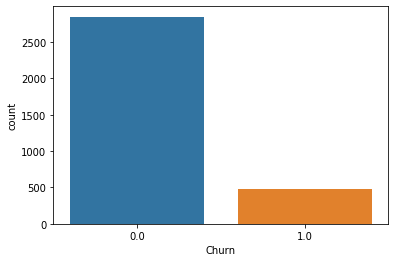

In [26]:
sns.countplot(x='Churn',data=df)

In [27]:
df.Churn.value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

### out of 3333 customers, 483 customers are churned out from their service¶
this is a class imbalanced data.
only 14.5 % data is belongs to churned class.

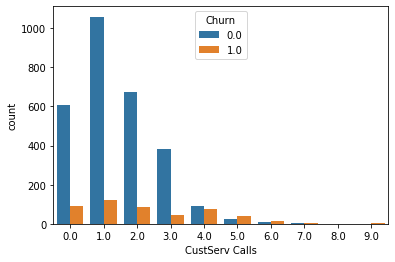

In [28]:
sns.countplot(x='CustServ Calls',hue = 'Churn',data=df )

# As customer calls increases customers are more likely to churn

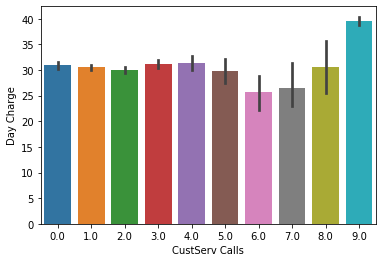

In [29]:
sns.barplot(x='CustServ Calls',y='Day Charge',data=df )

# customers who has high day charges,those customers are tend to contact customer care

Text(0.5, 0, 'DAY CHARGE')

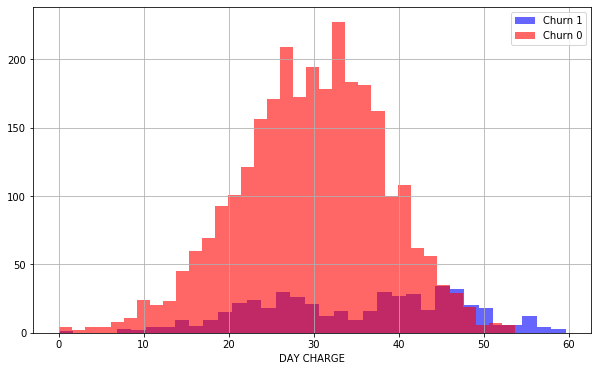

In [30]:
plt.figure(figsize=(10,6))
df[df['Churn']==1]['Day Charge'].hist(bins=35,color = 'blue',label = 'Churn 1',alpha = 0.6)
df[df['Churn']==0]['Day Charge'].hist(bins = 35,color = 'red',label = 'Churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('DAY CHARGE')

# customers with high daily charge are more likely to churn.

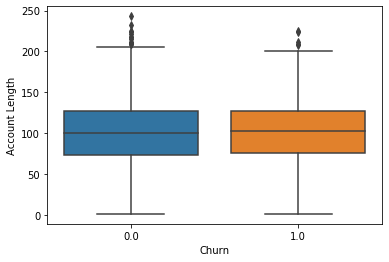

In [31]:
sns.boxplot(x = 'Churn',y='Account Length',data=df)

# account length has no significance on churning rate.

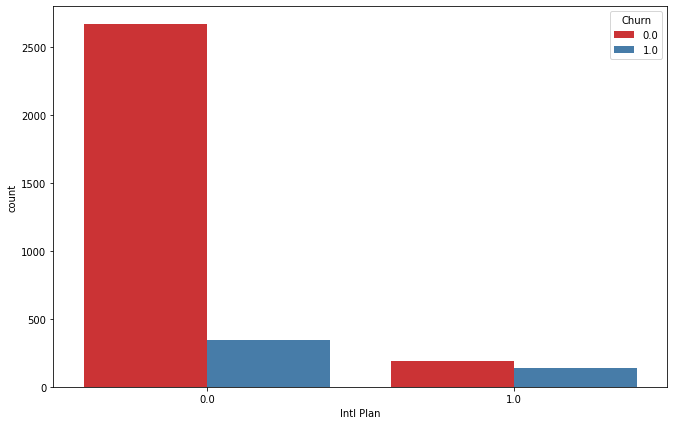

In [32]:
plt.figure(figsize=(11,7))
sns.countplot(x ='Intl Plan',hue='Churn',data = df,palette='Set1')

# customers with intl. plan are more churning as compared to the customers with no intl.plan

Text(0.5, 0, 'INTL CHARGE')

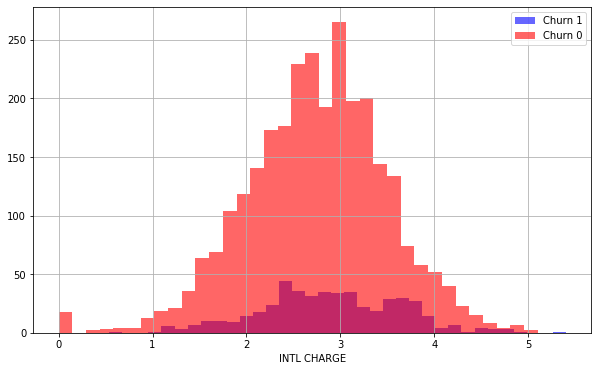

In [33]:
plt.figure(figsize=(10,6))
df[df['Churn']==1]['Intl Charge'].hist(bins=35,color = 'blue',label = 'Churn 1',alpha = 0.6)
df[df['Churn']==0]['Intl Charge'].hist(bins = 35,color = 'red',label = 'Churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('INTL CHARGE')

# EVEN MODERATE CHARGE FOR INTL PLAN. MAKING CUSTOMERS CHURN.
# MAY BE THEY HAVE SERVICE ISSUES.

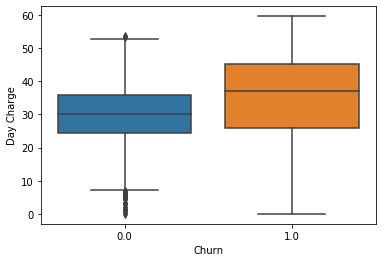

In [34]:
sns.boxplot(x="Churn",y="Day Charge",data=df)
plt.show()

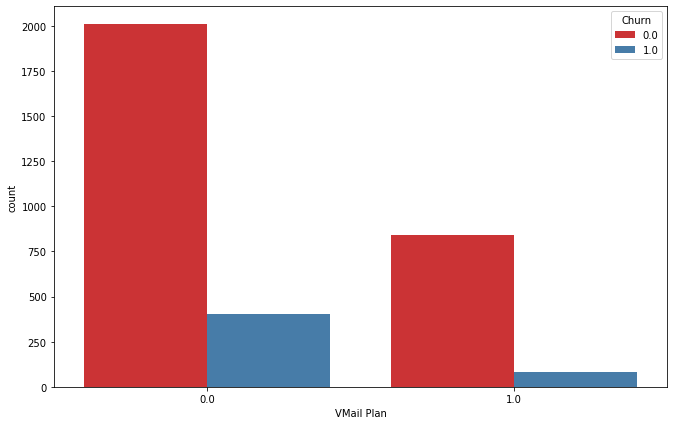

In [35]:
plt.figure(figsize=(11,7))
sns.countplot(x ='VMail Plan',hue='Churn',data = df,palette='Set1')

C:\Users\Rajesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


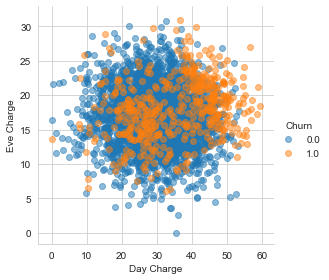

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Churn",size=4)\
  .map(plt.scatter,"Day Charge","Eve Charge",alpha = 0.5)\
  .add_legend();
plt.show();


# MOST OF THE CUSTOMERS ARE CHURNED WHO WERE GETTING HEAVY BILL.

## visualization with plotly library.

In [37]:
from plotly import __version__


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import cufflinks as cf

In [ ]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [ ]:
init_notebook_mode(connected = True)

In [ ]:
cf.go_offline()

In [ ]:
df.plot()

In [ ]:
#df2.iplot(kind='Phone',x='Area Code',y='Eve Charge',mode='markers')

In [ ]:
#df.iplot(kind='bar',x='Churn',y='Day Charge')

In [ ]:
#df.sum().iplot()

In [ ]:
#df.iplot(kind='box')

In [ ]:
#df.iplot(kind='hist')

In [ ]:
df.plot(kind='scatter',x='Day Charge',y='Eve Charge')

In [ ]:
df.plot(kind='bar',x='Churn',y='Day Charge')

### CHECKING CORRELATION AND MULTICOLLINEARITY

In [38]:
corr_mat = df.corr()

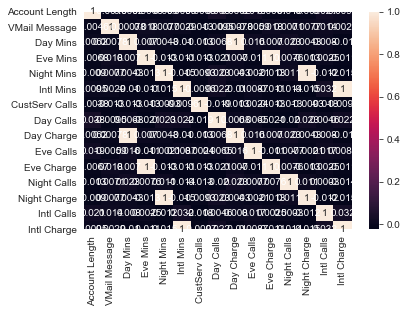

In [39]:
sns.heatmap(corr_mat,annot=True)

In [40]:
corr_mat

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


In [41]:
df.corr().unstack().sort_values().drop_duplicates()


Eve Mins        Day Calls        -0.021451
Eve Charge      Day Calls        -0.021449
Day Calls       Night Calls      -0.019557
CustServ Calls  Day Calls        -0.018942
Intl Calls      CustServ Calls   -0.017561
                                    ...   
Intl Charge     Intl Mins         0.999993
Night Mins      Night Charge      0.999999
Eve Charge      Eve Mins          1.000000
Day Charge      Day Mins          1.000000
Account Length  Account Length    1.000000
Length: 106, dtype: float64

## MULTICOLLINEAR VARIABLES
Night Mins   ,   Night Charge      0.999999

Eve Charge   ,   Eve Mins          1.000000

Day Charge   ,   Day Mins          1.000000

Intl Charge  ,  Intl Mins         0.999993

## WE NEED TO DISCARD ONE OF THOSE VARIABLES.

## CHECKING OUTLIERS

In [ ]:
sns.boxplot(df['Account Length'])

## clipping outliers

In [ ]:
df['Account Length'].clip(upper = 200,inplace = True)

In [ ]:
sns.boxplot(df['Account Length'])

In [ ]:
sns.boxplot(df['VMail Message'])

In [ ]:
sns.boxplot(df['Day Charge'])

In [ ]:
print(df['Day Charge'].quantile(0.99))
print(df['Day Charge'].quantile(0.01))


In [ ]:
df['Day Charge'].clip(lower = 8.312,upper = 51.88,inplace = True)

In [ ]:
sns.boxplot(df['Day Charge'])

In [ ]:
sns.boxplot(df['Eve Mins'])

In [ ]:
print(df['Eve Mins'].quantile(0.99))
print(df['Eve Mins'].quantile(0.01))


In [ ]:
df['Eve Mins'].clip(lower = 80,upper = 319,inplace = True)

In [ ]:
sns.boxplot(df['Eve Mins'])

In [ ]:
sns.boxplot(df['Day Mins'])

In [ ]:
print(df['Day Mins'].quantile(0.99))
print(df['Day Mins'].quantile(0.01))


In [ ]:
df['Day Mins'].clip(lower =51.84,upper = 306,inplace = True)

In [ ]:
sns.boxplot(df['Day Mins'])

In [ ]:
sns.boxplot(df['Night Mins'])

In [ ]:
print(df['Night Mins'].quantile(0.99))
print(df['Night Mins'].quantile(0.01))


In [ ]:
df['Night Mins'].clip(lower =80,upper = 318,inplace = True)

In [ ]:
sns.boxplot(df['Night Mins'])

In [ ]:
sns.boxplot(df['Intl Mins'])

In [ ]:
print(df['Intl Mins'].quantile(0.99))
print(df['Intl Mins'].quantile(0.01))


In [ ]:
df['Intl Mins'].clip(lower =3.4,upper = 16.67,inplace = True)

In [ ]:
sns.boxplot(df['Intl Mins'])

In [ ]:
sns.boxplot(df['Day Calls'])

In [ ]:
print(df['Day Calls'].quantile(0.99))
print(df['Day Calls'].quantile(0.01))


In [ ]:
df['Day Calls'].clip(lower =54,upper = 146,inplace = True)

In [ ]:
sns.boxplot(df['Day Calls'])

In [ ]:
sns.boxplot(df['Day Charge'])

In [ ]:
sns.boxplot(df['Eve Calls'])

In [ ]:
print(df['Eve Calls'].quantile(0.99))
print(df['Eve Calls'].quantile(0.01))


In [ ]:
df['Eve Calls'].clip(lower =58,upper = 147,inplace = True)

In [ ]:
sns.boxplot(df['Eve Calls'])

In [ ]:
sns.boxplot(df['Eve Charge'])

In [ ]:
print(df['Eve Charge'].quantile(0.99))
print(df['Eve Charge'].quantile(0.01))


In [ ]:
df['Eve Charge'].clip(lower =6.8,upper = 27.11,inplace = True)

In [ ]:
sns.boxplot(df['Eve Charge'])

In [ ]:
sns.boxplot(df['Night Calls'])

In [ ]:
print(df['Night Calls'].quantile(0.99))
print(df['Night Calls'].quantile(0.01))


In [ ]:
df['Night Calls'].clip(lower =57,upper = 147,inplace = True)

In [ ]:
sns.boxplot(df['Night Calls'])

In [ ]:
sns.boxplot(df['Night Charge'])

In [ ]:
print(df['Night Charge'].quantile(0.99))
print(df['Night Charge'].quantile(0.01))


In [ ]:
df['Night Charge'].clip(lower =3.6,upper = 14.28,inplace = True)

In [ ]:
sns.boxplot(df['Night Charge'])

In [ ]:
sns.boxplot(df['Intl Charge'])

In [ ]:
print(df['Intl Charge'].quantile(0.99))
print(df['Intl Charge'].quantile(0.01))


In [ ]:
df['Intl Charge'].clip(lower =0.9,upper = 4.50,inplace = True)

In [ ]:
sns.boxplot(df['Intl Charge'])

In [ ]:
sns.boxplot(df['Intl Calls'])

In [ ]:
print(df['Intl Calls'].quantile(0.99))
print(df['Intl Calls'].quantile(0.01))


In [ ]:
df['Intl Calls'].clip(lower =1,upper = 12,inplace = True)

In [ ]:
sns.boxplot(df['Intl Calls'])

In [ ]:
df_clean_data = df

## seperating X (input) and y(output) Variables

In [ ]:
X = df[['Account Length', 'VMail Message','CustServ Calls', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge']]

In [ ]:
y = df['Churn']

## DUMMIES

In [ ]:
X = pd.get_dummies(X,columns=['Intl Plan','VMail Plan'],drop_first=True)

# train and test split

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
glm = LogisticRegression(class_weight='balanced',random_state=69)

In [ ]:
glm.fit(X_train,y_train)

In [ ]:
glm.intercept_

In [ ]:
glm.coef_

## prediction on train data

In [ ]:
glm_pred_tr = glm.predict(X_train)

# validation on train


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_train,glm_pred_tr))

In [ ]:
print(classification_report(y_train,glm_pred_tr))

## Predictions on test dataset

In [ ]:
glm_pred = glm.predict(X_test)

# validation on test set

In [ ]:
print(confusion_matrix(y_test,glm_pred))

In [ ]:
print(classification_report(y_test,glm_pred))

## modelling after scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

## TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [ ]:
glm.fit(X_train,y_train)

In [ ]:
glm.intercept_

In [ ]:
glm.coef_

### prediction on train data

In [ ]:
glm_pred_tr = glm.predict(X_train)

# validation on train

In [ ]:
print(confusion_matrix(y_train,glm_pred_tr))

In [ ]:
print(classification_report(y_train,glm_pred_tr))

# prediction on test data

In [ ]:
glm_pred = glm.predict(X_test)

# VALIDATION ON TEST DATA

In [ ]:
print(confusion_matrix(y_test,glm_pred))

In [ ]:
print(classification_report(y_test,glm_pred))

### STATS MODEL

In [ ]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [ ]:
y = list(y)
model = sm.Logit(y,X).fit()

In [ ]:
predict = model.predict(X)

print(model.summary())

#      Logit Regression Results                           
==============================================================================
# Dep. Variable:                      y   No. Observations:                 3333
# Model:                          Logit   Df Residuals:                     3320
# Method:                           MLE   Df Model:                           12
# Date:                Tue, 10 Jul 2018   Pseudo R-squ.:                 -0.5613
# Time:                        16:06:48   Log-Likelihood:                -2153.2
# converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                     1.000
==================================================================================
#                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
# Account Length     0.0180      0.036      0.496      0.620      -0.053       0.089

# VMail Message      0.1124      0.127      0.886      0.375      -0.136       0.361

# CustServ Calls     0.3375      0.038      8.956      0.000       0.264       0.411

# Day Calls          0.0324      0.036      0.890      0.373      -0.039       0.104

# Day Charge         0.2947      0.037      7.951      0.000       0.222       0.367

# Eve Calls          0.0033      0.036      0.092      0.927      -0.068       0.074

# Eve Charge         0.1450      0.037      3.968      0.000       0.073       0.217

# Night Calls        0.0060      0.036      0.166      0.868      -0.065       0.077

# Night Charge       0.0739      0.036      2.026      0.043       0.002       0.145

# Intl Calls        -0.0958      0.037     -2.622      0.009      -0.167      -0.024

# Intl Charge        0.0955      0.036      2.620      0.009       0.024       0.167

# Intl Plan_1.0      0.4196      0.042     10.040      0.000       0.338       0.501

# VMail Plan_1.0    -0.2629      0.127     -2.071      0.038      -0.512      -0.014


### discarding insignificant variables

In [ ]:
X = X[['CustServ Calls','Day Charge', 'Eve Charge', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Intl Plan_1.0', 'VMail Plan_1.0']]

In [ ]:
y =df['Churn']

## Logistic regression

In [ ]:
glm.fit(X_train,y_train)

In [ ]:
glm.coef_

In [ ]:
glm.intercept_

## prediction on train data

In [ ]:
glm_pred_tr = glm.predict(X_train)

## validation on train data

In [ ]:
print(confusion_matrix(y_train,glm_pred_tr))

In [ ]:
print(classification_report(y_train,glm_pred_tr))

## prediction on test data

In [ ]:
glm_pred = glm.predict(X_test)

## validation on test data

In [ ]:
print(confusion_matrix(y_test,glm_pred))

In [ ]:
print(classification_report(y_test,glm_pred))

## K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)

# ERROR RATE

In [ ]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker = 'o',
        markerfacecolor='red',markersize = 10)
plt.title("ERROR RATE VS K VALUE")
plt.ylabel('error rate')
plt.xlabel('no. of K')
plt.show()

# AS WE CAN SEE THE OPTIMAL VALUE OF K = 5

### PREDICTION ON TRAIN SET

In [ ]:
y_train_pred = knn.predict(X_train)

## validation

In [ ]:
print(confusion_matrix(y_train,y_train_pred))

In [ ]:
print(classification_report(y_train,y_train_pred))

### validation

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

## Clustering ######

In [ ]:
df2.head()

In [ ]:
df2.dtypes

# coverting in to numeric

In [ ]:
df3 = df2.groupby(['Area Code','State']).agg('count').reset_index()

In [ ]:
df3.head()

In [ ]:
df3['State'] = df3['State'].astype('category')

In [ ]:
df3['State'] = df3['State'].cat.codes

### X- array

In [ ]:
X = df3[['State','Area Code','Phone']].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=3565)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(range(1,11),wss)
plt.title('THE ELBOW CURVE')
plt.xlabel('NO. OF K')
plt.ylabel('wss')
plt.show()

# optimal number of k=4

In [ ]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300,n_init=10,random_state = 3565)

In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

In [ ]:
print(len(y_kmeans))

In [ ]:
df3.head()

In [ ]:
df4 = df2.groupby(['Area Code','State']).agg('count').reset_index()

In [ ]:
df4['cluster'] = y_kmeans

In [ ]:
df4.head()

In [ ]:
df5 = pd.merge(df2,df4,on=['Area Code','State'])

### concating our cluster result with main dataframe

In [ ]:
df['cluster'] = df5['cluster']

In [ ]:
df.columns

### performing logistic regression along with cluster variable

### train test splitting

In [ ]:
X = df[['CustServ Calls','Day Charge', 'Eve Charge', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Intl Plan', 'VMail Plan','cluster']]

In [ ]:
y = df['Churn']

## dummies

In [ ]:
X = pd.get_dummies(X,columns=['Intl Plan','VMail Plan','cluster'],drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=35)

# logistic regression

In [ ]:
glm.fit(X_train,y_train)

In [ ]:
y_glm_pred = glm.predict(X_test)

### validation on test set

In [ ]:
print(confusion_matrix(y_test,y_glm_pred))

In [ ]:
print(classification_report(y_test,y_glm_pred))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=69)

In [ ]:
rclf.fit(X_train,y_train)

## random forest validation

In [ ]:
rclf_tr_pred = rclf.predict(X_train)

In [ ]:
print(confusion_matrix(y_train,rclf_tr_pred))

In [ ]:
print(classification_report(y_train,rclf_tr_pred))

## validation on test data 

In [ ]:
rclf_preds = rclf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rclf_preds))

In [ ]:
print(classification_report(y_test,rclf_preds))

In [ ]:
rclf.feature_importances_

In [ ]:
dict(zip(X.columns.values,rclf.feature_importances_))

### top influence feature


 'CustServ Calls': 0.21784574507107649,

 'Day Charge': 0.3153824424210542,
 
 'Eve Charge': 0.09586042786869987,
 
 'Intl Calls': 0.04813807365356402,
 
 'Intl Charge': 0.07033200333090232,
 
 'Intl Plan_1.0': 0.1441838905079129,
 
 'Night Charge': 0.05482930403650932,
 
 'VMail Plan_1.0': 0.04312877234451399,
 

# LOGISTIC REGRESSION ON TOP INFLUENCE VARIABLES

In [ ]:
X = df[['CustServ Calls','Day Charge', 'Eve Charge', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Intl Plan', 'VMail Plan']]

In [ ]:
glm.fit(X_train,y_train)

In [ ]:
y_train_pred = glm.predict(X_train)

## validation on train dataset

In [ ]:
print(confusion_matrix(y_train,y_train_pred))

In [ ]:
print(classification_report(y_train,y_train_pred))

## validation on test set

In [ ]:
y_test_pred = glm.predict(X_test)

In [ ]:
print(classification_report(y_test,y_test_pred))

In [ ]:
print(classification_report(y_test,y_test_pred))

# Principal component analysis 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_pca = df[['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls','Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge']]

In [ ]:
df_pca.dtypes

In [ ]:
df_pca = pd.DataFrame(sc.fit_transform(df_pca),columns=df_pca.columns)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
df_pca.shape

In [ ]:
x_pca = pca.fit_transform(df_pca)

In [ ]:
x_pca.shape

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0],x_pca[:,1],c=df['Churn'],cmap='plasma')
plt.xlabel("FIRST PRINCIPAL COMPONENT")
plt.ylabel("SECOND PRINCIPAL COMPONENT")
plt.show()

In [ ]:
pca.components_

In [ ]:
pca_comp = pd.DataFrame(pca.components_,columns=[df_pca.columns])

In [ ]:
pca_comp

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(pca_comp,cmap='plasma')

### this graph shows the relationship between correlation of various features and principal components.

In [ ]:
churn_df =pd.read_csv("C:\\Users\\user\\Documents\\Churn_MV.csv")

In [ ]:
churn_df.dropna(axis=0,how='all',inplace=True)

In [ ]:
churn_df = churn_df.reset_index()

In [ ]:
pca_df = pd.DataFrame(x_pca)

In [ ]:
pca_df['Intl Plan'] = churn_df['Intl Plan']

In [ ]:
pca_df['VMail Plan'] = churn_df['VMail Plan']


In [ ]:
pca_df['cluster'] = df5['cluster']


In [ ]:
pca_df.head()

## dummies

In [ ]:
pca_df = pd.get_dummies(pca_df,columns=['Intl Plan','VMail Plan','cluster'],drop_first=True)

In [ ]:
pca_df.head()

# train test splitting

In [ ]:
X = pca_df
y = churn_df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


# Random Forest

In [ ]:
rclf = RandomForestClassifier(n_estimators=50)

In [ ]:
rclf.fit(X_train,y_train)

In [ ]:
tr_pred = rclf.predict(X_train)

## validation on train set

In [ ]:
print(confusion_matrix(y_train,tr_pred))

In [ ]:
print(classification_report(y_train,tr_pred))

# validation on test set

In [ ]:
test_pred = rclf.predict(X_test)

In [ ]:
print(confusion_matrix(y_train,tr_pred))

In [ ]:
print(classification_report(y_train,tr_pred))

# by far the best result we have got.

In [ ]:
rclf.feature_importances_

In [ ]:
dict(zip(X.columns.values,rclf.feature_importances_))

### PCA + CLUSTERING + LOGISTIC REGRESSION

In [ ]:
glm.fit(X_train,y_train)

In [ ]:
glm_train_pred = glm.predict(X_train)

### validation on train set

In [ ]:
print(classification_report(y_train,glm_train_pred))

In [ ]:
print(classification_report(y_train,glm_train_pred))

### validation on test set.

In [ ]:
glm_test_pred = glm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,glm_test_pred))

In [ ]:
print(classification_report(y_test,glm_test_pred))

# ADABOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
aclf = AdaBoostClassifier(n_estimators=600,random_state=56)

In [ ]:
aclf.fit(X_train,y_train)

In [ ]:
aclf_train_preds = aclf.predict(X_train)

# validation on test set

In [ ]:
print(confusion_matrix(y_train,aclf_train_preds))

In [ ]:
print(classification_report(y_train,aclf_train_preds))

### validation on test set

In [ ]:
aclf_test_preds = aclf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,aclf_test_preds))

In [ ]:
print(classification_report(y_test,aclf_test_preds))

In [ ]:
dict(zip(X.columns.values,aclf.feature_importances_))

### BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bclf = BaggingClassifier(n_estimators=20,random_state=69)

In [ ]:
bclf.fit(X_train,y_train)

In [ ]:
bclf_train_preds = bclf.predict(X_train)

## validation on train set

In [ ]:
print(confusion_matrix(y_train,bclf_train_preds))

In [ ]:
print(classification_report(y_train,bclf_train_preds))

### validation on test data

In [ ]:
bclf_test_preds = bclf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,bclf_test_preds))

In [ ]:
print(classification_report(y_test,bclf_test_preds))

In [ ]:
aclf.feature_importances_

# GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gclf = GradientBoostingClassifier(n_estimators=3000,verbose=True,min_samples_leaf=5)

In [ ]:
gclf.fit(X_train,y_train)

In [ ]:
gclf_train_preds = gclf.predict(X_train)

In [ ]:
print(confusion_matrix(y_train,gclf_train_preds))

In [ ]:
print(classification_report(y_train,gclf_train_preds))

## validation on test set

In [ ]:
gclf_test_preds = gclf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,gclf_test_preds))

In [ ]:
print(classification_report(y_test,gclf_test_preds))

## PCA + CLUSTER + SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(class_weight='balanced')

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
svc_train_preds = svc.predict(X_train)

### validation on train data 

In [ ]:
print(confusion_matrix(y_train,svc_train_preds))

In [ ]:
print(classification_report(y_train,svc_train_preds))

## validation on test test

In [ ]:
svc_test_preds = svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,svc_test_preds))

In [ ]:
print(classification_report(y_test,svc_test_preds))

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
grid_preds = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_preds))

In [ ]:
print(classification_report(y_test,grid_preds))